In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/labs/amit/noamsh/repos/sc_clustering')

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
import anndata as ad
from sklearn import metrics


In [3]:
from pathlib import Path

import config

In [4]:
meta_cell_results_path = Path("/home/labs/amit/noamsh/mc.csv")
mc_prediction = pd.read_csv(meta_cell_results_path)
mc_prediction = mc_prediction.set_index("Unnamed: 0", drop=True)
mc_prediction

,mc.mc,group,sub_group
Unnamed: 0,,,
W1072395,78,MAC,Mac_Spp1
W1072396,102,MAC,Mac_C1qa_MHCII
W1072397,156,MAC,Mac_C1qa
W1072398,51,CD4,CD4_Il7r
W1072399,68,CD4,CD4_Il7r
...,...,...,...
W1529428,19,CD8,CD8_Cyc
W1529429,1,CD8,CD8_Cxcr6
W1529430,3,CD8,CD8_Cxcr6


In [5]:
np.unique(mc_prediction["group"].fillna("NO_GROUP").values)

array(['B', 'CD4', 'CD8', 'DC', 'Doublets', 'MAC', 'MON', 'Mon', 'NK',
       'NO_GROUP', 'Neutrophils', 'Treg', 'Tumor', 'g/d T'], dtype=object)

In [6]:
last_experiment_dir = Path(config.RESULTS_DIR, "simple_clustering_2021_06_07__13_03_04")
final_adata = ad.read(Path(last_experiment_dir, "final_adata.h5ad"))

In [7]:
ind_of_adata_in_mc = [obs_name in mc_prediction.index for obs_name in final_adata.obs_names]
combined_adata = final_adata[ind_of_adata_in_mc, :]

In [8]:
sc.pp.neighbors(combined_adata, n_neighbors=5)

In [9]:
sc.tl.umap(combined_adata)

In [10]:
sc.tl.leiden(combined_adata, resolution=1.5)

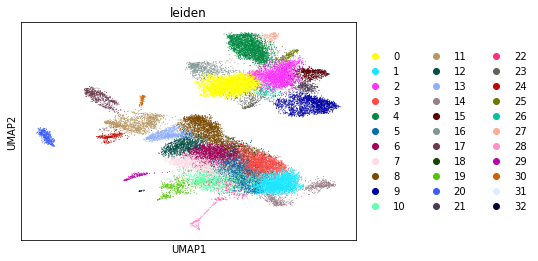

In [11]:
sc.pl.umap(combined_adata, color=['leiden'])

In [12]:
ind_of_mc_in_adata = [obs_name in final_adata.obs_names for obs_name in mc_prediction.index]
mc_prediction = mc_prediction[ind_of_mc_in_adata]
combined_adata.obs["mc"] = mc_prediction["mc.mc"]

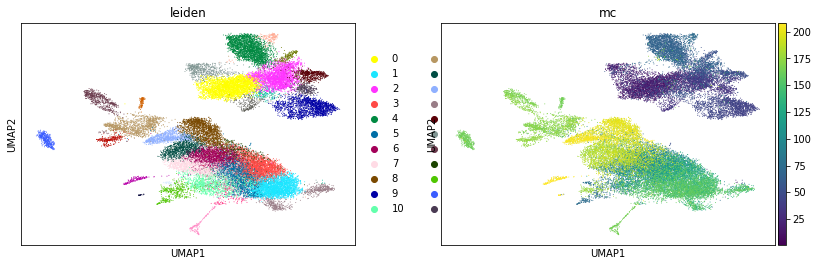

In [13]:
sc.pl.umap(combined_adata, color=['leiden', "mc"])

In [14]:
leiden_pred = combined_adata.obs["leiden"]
mc_pred = combined_adata.obs["mc"]
metrics.adjusted_rand_score(leiden_pred, mc_pred)

0.09796536261330621

In [15]:
metrics.adjusted_mutual_info_score(leiden_pred, mc_pred)

0.49741989982659396

In [16]:
metrics.completeness_score(mc_pred, leiden_pred)

0.69191773604943

In [22]:
sc.pl.dotplot(combined_adata,"leiden", 'mc')

TypeError: Unordered Categoricals can only compare equality or not